In [1]:
import io
import numpy as np
import PIL
import requests
import torch
import openpifpaf
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
from glob import glob
try:
    from PIL import Image
except ImportError:
    import Image
from time import time
from tqdm import tqdm, tqdm_notebook
import json
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
print('OpenPifPaf version', openpifpaf.__version__)
print('PyTorch version', torch.__version__)

OpenPifPaf version 0.12.14
PyTorch version 1.10.0+cpu


In [4]:
videos = glob('datasets/Weizmann/videos/jack/*')

In [5]:
videos[0]

'datasets/Weizmann/videos/jack\\daria_jack.avi'

In [4]:
videos[0].split('\\')[-1].split('.')[0]

'daria_jack'

In [13]:
os.path.isdir('datasets/Weizmann/frames/jack/daria_jack')

False

In [57]:
os.mkdir('datasets/Weizmann/frames/walk/davi')

In [555]:
# actions = ['jump', 'pjump', 'run', 'side', 'skip', 'bend', 'wave1', 'wave2']
actions = ['wave2']

for action in actions:
    videos = glob('datasets/Weizmann/videos/'+action+'/*')

    for video in tqdm(videos):
        name_of_actor = video.split('\\')[-1].split('.')[0]

        if not os.path.isdir('datasets/Weizmann/frames/'+action):
            os.mkdir('datasets/Weizmann/frames/'+action)

        if not os.path.isdir('datasets/Weizmann/frames/'+action+'/'+name_of_actor):
            os.mkdir('datasets/Weizmann/frames/'+action+'/'+name_of_actor)

        vidcap = cv2.VideoCapture(video)
        success,image = vidcap.read()
        count = 0
        while success:
            cv2.imwrite("datasets/Weizmann/frames/"+action+"/"+name_of_actor+"/frame%d.jpg" % count, image)     # save frame as JPEG file      
            success,image = vidcap.read()
            count += 1

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.96it/s]


In [6]:
frames_folders = glob('datasets/Weizmann/frames/wave2/*')

In [7]:
frames_folders

['datasets/Weizmann/frames/wave2\\daria_wave2',
 'datasets/Weizmann/frames/wave2\\denis_wave2',
 'datasets/Weizmann/frames/wave2\\eli_wave2',
 'datasets/Weizmann/frames/wave2\\ido_wave2',
 'datasets/Weizmann/frames/wave2\\ira_wave2',
 'datasets/Weizmann/frames/wave2\\lena_wave2',
 'datasets/Weizmann/frames/wave2\\lyova_wave2',
 'datasets/Weizmann/frames/wave2\\moshe_wave2',
 'datasets/Weizmann/frames/wave2\\shahar_wave2']

In [8]:
frames_actual = glob(frames_folders[0]+"/*.jpg")

In [17]:
for frame_folder in tqdm_notebook(frames_folders):
    frames_actual = glob(frame_folder+"/*.jpg")
    
    for frame in frames_actual:
        name_of_actor = frame.split('\\')[-2]
        
        if not os.path.isdir('datasets/Weizmann/pifpafheatmaps/wave2'):
            os.mkdir('datasets/Weizmann/pifpafheatmaps/wave2')
        
        if not os.path.isdir('datasets/Weizmann/pifpafheatmaps/wave2/'+name_of_actor):
            os.mkdir('datasets/Weizmann/pifpafheatmaps/wave2/'+name_of_actor)
        
        if not os.path.isdir('datasets/Weizmann/pifpafheatmaps/wave2/'+name_of_actor+'/'+frame.split('\\')[-1].split('.')[0]):
            os.mkdir('datasets/Weizmann/pifpafheatmaps/wave2/'+name_of_actor+'/'+frame.split('\\')[-1].split('.')[0])
            
        os.system(
            "python -m openpifpaf.predict "+frame.replace('\\', '/')+" -q --image-output --debug-indices cif:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16 --save-all=datasets/Weizmann/pifpafheatmaps/wave2/"+name_of_actor+"/"+frame.split('\\')[-1].split('.')[0])

C:\Anaconda\envs\harbop\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/9 [00:00<?, ?it/s]

In [89]:
os.system(
            "python -m openpifpaf.predict datasets/Weizmann/pifpafheatmaps/walk/daria_walk/frame0.jpg.predictions.jpeg -q --debug-indices cif:0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16 --save-all=datasets/Weizmann/pifpafheatmaps/walk/"+name_of_actor)

0

In [465]:
pil_im = PIL.Image.open("datasets/Weizmann/frames/wave2/daria_wave2/frame2.jpg").convert('RGB')
im = np.asarray(pil_im)

In [466]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

In [467]:
predictions[0].data

array([[ 55.26448   ,  57.361076  ,   0.5292886 ],
       [ 56.122913  ,  56.136642  ,   0.5642391 ],
       [ 54.33905   ,  56.21957   ,   0.45369384],
       [ 57.862907  ,  56.669937  ,   0.52911466],
       [ 52.918163  ,  56.909115  ,   0.45812553],
       [ 60.33988   ,  61.869736  ,   0.7900785 ],
       [ 51.33407   ,  62.35469   ,   0.7826369 ],
       [ 66.58074   ,  55.598175  ,   0.63352966],
       [ 45.442654  ,  57.97446   ,   0.62512916],
       [ 67.04378   ,  48.961487  ,   0.56025183],
       [ 43.61461   ,  51.079502  ,   0.49001336],
       [ 59.138855  ,  79.23557   ,   0.87992495],
       [ 53.576714  ,  79.28958   ,   0.8061539 ],
       [ 59.25      ,  95.16648   ,   0.8153392 ],
       [ 55.661594  ,  94.89848   ,   0.77125716],
       [ 59.92888   , 109.05706   ,   0.7682495 ],
       [ 57.074055  , 109.06134   ,   0.7292752 ]], dtype=float32)

In [31]:
os.system(
            "python -m openpifpaf.predict datasets/Weizmann/frames/bend/daria_bend/frame25.jpg --json-output")

0

In [576]:
f = open('datasets/Weizmann/frames/bend/daria_bend/frame0.jpg.predictions.json')

In [577]:
data = json.load(f)

In [578]:
x,y,w,h = data[0]['bbox']

In [579]:
print(x)
print(y)
print(w)
print(h)

52.8
56.15
11.34
54.65


In [18]:
x = x*2
y = y*2
w = w*2
h = h*2

In [580]:
center = (int((x+w/2)), int((y+h/2)))

In [581]:
center

(58, 83)

In [39]:
# img = cv2.imread("datasets/Weizmann/frames/bend/daria_bend/frame0.jpg.predictions.jpeg")

In [584]:
img = cv2.imread("datasets/Weizmann/frames/bend/daria_bend/frame0.jpg")


In [586]:
# cropped_image = img[int(y*2):int(y*2)+int(h*2), int(x*2):int(x*2)+int(w*2)]
cropped_image = img[center[1]-40:center[1]+40, center[0]-40:center[0]+40]

In [587]:
cv2.imwrite('contour1.png', cropped_image)

True

In [588]:
im = Image.open('contour1.png')

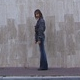

In [589]:
im

### Gerando a média para os heatmaps

In [561]:
imgs = glob("datasets/Weizmann/frames/bend/daria_bend/*.jpg")

In [562]:
imgs[0]

'datasets/Weizmann/frames/bend/daria_bend\\frame0.jpg'

In [565]:
f = open('datasets/Weizmann/frames/bend/daria_bend/frame0.jpg.predictions.json')
        
data = json.load(f)

x,y,w,h = data[0]['bbox']

center = (int((x+w/2)), int((y+h/2)))

In [566]:
center

(58, 83)

In [459]:
imgs = imgs[34:]

In [567]:
imgs[0]

'datasets/Weizmann/frames/bend/daria_bend\\frame0.jpg'

In [568]:
tmp_img = cv2.imread(imgs[0])
cropped_image = tmp_img[center[1]-80:center[1]+80, center[0]-80:center[0]+80]

In [591]:
w,h=tmp_img.shape[1], tmp_img.shape[0]

In [570]:
images = glob('datasets/Weizmann/frames/bend/daria_bend/*.jpg')

In [571]:
images[0].replace('\\', '/').split('/')[-1]

'frame0.jpg'

In [601]:
center

(132, 153)

In [593]:
images = glob('datasets/Weizmann/frames/bend/daria_bend/*.jpg')
for image in tqdm_notebook(images):

    pil_im = PIL.Image.open(image.replace('\\', '/')).convert('RGB')
    im = np.asarray(pil_im)


    predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
    predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

    map_colors = {0: np.array([161, 141, 39]),
                  5: np.array([193, 10, 80]),
                  6: np.array([239, 246, 80]),
                  7: np.array([146, 189, 180]),
                  8: np.array([234, 213, 170]),
                  9: np.array([36, 145, 42]),
                  10: np.array([197, 216, 26]),
                  11: np.array([218, 70, 117]),
                  12: np.array([254, 148, 232]),
                  13: np.array([255, 255, 255]),
                  14: np.array([255, 0, 0]),
                  15: np.array([0, 255, 0]),
                  16: np.array([0, 0, 255]),
                  }

    contour_image = np.zeros((h,w,3),np.float)

    for i in np.arange(0,17):
        if (predictions[0].data[i][2] != 0) and (i not in [1,2,3,4]):
            x = predictions[0].data[i][0]
            y = predictions[0].data[i][1]

            x = (int(x))+3
            y = (int(y))-3

            contour_image[int(y)-2:int(y)+2, int(x)-2:int(x)+2] = map_colors[i][::-1]
            cropped_image = contour_image[center[1]-40:center[1]+40, center[0]-40:center[0]+40]
    
    cv2.imwrite('datasets/Weizmann/heatmapsfeatures/bend/daria_bend/'+image.replace('\\', '/').split('/')[-1], cropped_image)

C:\Anaconda\envs\harbop\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/84 [00:00<?, ?it/s]

In [493]:
x = predictions[0].data[16][0]
y = predictions[0].data[16][1]

In [494]:
print(x)
print(y)

57.074055
109.06134


In [495]:
x = (int(x*2))+3
y = (int(y*2))-3

In [496]:
print(x)
print(y)

117
215


In [473]:
contour_image[int(y)-3:int(y)+3, int(x)-3:int(x)+3] = np.array([0,255,0])

In [413]:
cropped_image = contour_image[center[1]-80-30:center[1]+60, center[0]-80:center[0]+80+10]

In [545]:
cv2.imwrite('contour2.png', cropped_image)

True

In [546]:
im = Image.open('contour2.png')

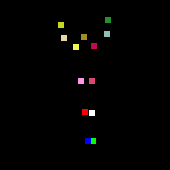

In [547]:
im

In [597]:
frames_folders = glob('datasets/Weizmann/frames/bend/*')

In [611]:
actions = ['walk']
# actions = ['jack', 'bend', 'jump', 'pjump', 'run', 'side', 'skip', 'bend', 'wave1', 'wave2']
for action in actions:
    frames_folders = glob('datasets/Weizmann/frames/'+action+'/*')
    for frame_folder in tqdm_notebook(frames_folders):
        frames_actual = glob(frame_folder+"/*.jpg")

        for frame in frames_actual[2:]:
            name_of_actor = frame.split('\\')[-2]


            tmp_img = cv2.imread(frame)

            if not os.path.isdir('datasets/Weizmann/heatmapsfeatures/'+action):
                os.mkdir('datasets/Weizmann/heatmapsfeatures/'+action)

            if not os.path.isdir('datasets/Weizmann/heatmapsfeatures/'+action+'/'+name_of_actor):
                os.mkdir('datasets/Weizmann/heatmapsfeatures/'+action+'/'+name_of_actor)

            f = open('datasets/Weizmann/frames/'+action+'/'+name_of_actor+'/'+frame.replace('\\', '/').split('/')[-1]+'.predictions.json')

            data = json.load(f)

            x,y,w,h = data[0]['bbox']

            center = (int((x+w/2)), int((y+h/2)))

            w,h=tmp_img.shape[1], tmp_img.shape[0]

            pil_im = PIL.Image.open(frame.replace('\\', '/')).convert('RGB')
            im = np.asarray(pil_im)

            predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16')
            predictions, gt_anns, image_meta = predictor.pil_image(pil_im)

            map_colors = {0: np.array([161, 141, 39]),
                          5: np.array([193, 10, 80]),
                          6: np.array([239, 246, 80]),
                          7: np.array([146, 189, 180]),
                          8: np.array([234, 213, 170]),
                          9: np.array([36, 145, 42]),
                          10: np.array([197, 216, 26]),
                          11: np.array([218, 70, 117]),
                          12: np.array([254, 148, 232]),
                          13: np.array([255, 255, 255]),
                          14: np.array([255, 0, 0]),
                          15: np.array([0, 255, 0]),
                          16: np.array([0, 0, 255]),
                          }

            contour_image = np.zeros((h,w,3),np.float)

            window_x_negative, window_x_positive, window_y_negative, window_y_positive = 50, 50, 50, 50
            if center[0]-window_x_negative < 0:
                window_x_negative = center[0]
                window_x_positive = 50+(50-center[0])
            if center[1]-window_y_negative < 0:
                window_y_negative = center[1]
                window_y_positive = 50+(50-center[1])

            if center[0]+window_x_positive > img.shape[1]:
                window_x_negative = 50+(50-(img.shape[1]-center[0]))
                window_x_positive = (img.shape[1]-center[0])
            if center[1]+window_y_positive > img.shape[0]:
                window_y_negative = 50+(50-(img.shape[0]-center[1]))
                window_y_positive = (img.shape[0]-center[1])

            for i in np.arange(0,17):
                if (predictions[0].data[i][2] != 0) and (i not in [1,2,3,4]):
                    x = predictions[0].data[i][0]
                    y = predictions[0].data[i][1]

                    x = (int(x))+3
                    y = (int(y))-3

                    contour_image[int(y)-2:int(y)+2, int(x)-2:int(x)+2] = map_colors[i][::-1]
                    cropped_image = contour_image[center[1]-window_y_negative:center[1]+window_y_positive, center[0]-window_x_negative:center[0]+window_x_positive]

            cv2.imwrite("datasets/Weizmann/heatmapsfeatures/"+action+"/"+name_of_actor+"/"+frame.replace('\\', '/').split('/')[-1], cropped_image)
        

C:\Anaconda\envs\harbop\lib\site-packages\ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
tmp_img = cv2.imread(imgs[0])
cropped_image = tmp_img[center[1]-80-25:center[1]+60, center[0]-80:center[0]+80+10]
arr = np.array(cropped_image)

for img in imgs[1:]:
    tmp_img = cv2.imread(img)
    cropped_image = tmp_img[center[1]-80-25:center[1]+60, center[0]-80:center[0]+80+10]
    w,h=Image.open(images[0]).size

            imarr=np.array(Image.open(im),dtype=np.float)
            arr=arr+imarr/N

In [141]:
imgs = glob("datasets/Weizmann/pifpafheatmaps/bend/daria_bend/frame0/*.jpeg")
imgs = imgs[34:]

tmp_img = cv2.imread(imgs[0])
cropped_image = tmp_img[center[1]-80-30:center[1]+60, center[0]-80:center[0]+80+10]

w,h=cropped_image.shape[0], cropped_image.shape[1]
N=len(imgs)
print(w)
print(h)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((h,w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imgs:
    imarr=np.array(Image.open(im),dtype=np.float)
    cropped_image = imarr[center[1]-80-30:center[1]+60, center[0]-80:center[0]+80+10]
    arr=arr+cropped_image/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")

170
170


In [53]:
f = open('datasets/Weizmann/frames/jump/daria_jump/frame60.jpg.predictions.json')
        
data = json.load(f)

x,y,w,h = data[0]['bbox']

x = x*2
y = y*2
w = w*2
h = h*2

center = (int((x+w/2)), int((y+h/2)))

In [54]:
center

(298, 160)

In [56]:
img = cv2.imread("datasets/Weizmann/frames/jump/daria_jump/frame60.jpg.predictions.jpeg")

In [57]:
img.shape

(288, 360, 3)

In [59]:
window_x_negative, window_x_positive, window_y_negative, window_y_positive = 80, 80, 80, 80

In [60]:
if center[0]-window_x_negative < 0:
    window_x_negative = center[0]
    window_x_positive = 80+(80-center[0])
if center[1]-window_y_negative < 0:
    window_y_negative = center[1]
    window_y_positive = 80+(80-center[1])

if center[0]+window_x_positive > img.shape[1]:
    window_x_negative = 80+(80-(img.shape[1]-center[0]))
    window_x_positive = (img.shape[1]-center[0])
if center[1]+window_y_positive > img.shape[0]:
    window_y_negative = 80+(80-(img.shape[0]-center[1]))
    window_y_positive = (img.shape[0]-center[1])

In [73]:
center[1]-window_y_negative

83

In [74]:
center[1]+window_y_positive

243

In [75]:
center[0]-window_x_negative

0

In [76]:
center[0]+window_x_positive

160

In [67]:
cropped_image = img[center[1]-window_y_negative:center[1]+window_y_positive, center[0]-window_x_negative:center[0]+window_x_positive]

In [68]:
cropped_image

array([[[149, 144, 153],
        [148, 143, 152],
        [149, 142, 149],
        ...,
        [153, 146, 153],
        [154, 147, 154],
        [155, 148, 155]],

       [[149, 144, 153],
        [149, 144, 153],
        [151, 144, 151],
        ...,
        [155, 147, 154],
        [155, 148, 155],
        [157, 150, 157]],

       [[147, 142, 151],
        [148, 143, 152],
        [150, 143, 150],
        ...,
        [155, 147, 154],
        [156, 149, 156],
        [157, 150, 157]],

       ...,

       [[151, 138, 136],
        [149, 137, 135],
        [150, 137, 135],
        ...,
        [154, 137, 140],
        [152, 135, 138],
        [151, 134, 137]],

       [[162, 147, 144],
        [160, 145, 142],
        [160, 145, 142],
        ...,
        [150, 129, 131],
        [148, 127, 129],
        [146, 125, 127]],

       [[141, 125, 119],
        [140, 124, 118],
        [140, 124, 118],
        ...,
        [111,  90,  92],
        [109,  88,  90],
        [106,  85,  87]]

In [51]:
frames_actual = glob(frames_folders[0]+"/*.jpg")

In [90]:
frames_folders = glob('datasets/Weizmann/frames/walk/*')

In [91]:
frames_folders[0]

'datasets/Weizmann/frames/walk\\daria_walk'

In [92]:
for frame_folder in tqdm_notebook(frames_folders):
    frames_actual = glob(frame_folder+"/*.jpg")
    
    for frame in frames_actual:
        name_of_actor = frame.split('\\')[-2]
        
        if not os.path.isdir('datasets/Weizmann/skeletons_croppeds/walk'):
            os.mkdir('datasets/Weizmann/skeletons_croppeds/walk')
        
        if not os.path.isdir('datasets/Weizmann/skeletons_croppeds/walk/'+name_of_actor):
            os.mkdir('datasets/Weizmann/skeletons_croppeds/walk/'+name_of_actor)
        
        os.system(
            "python -m openpifpaf.predict "+frame.replace('\\', '/')+" --json-output")
        
        f = open('datasets/Weizmann/frames/walk/'+name_of_actor+'/'+frame.replace('\\', '/').split('/')[-1]+'.predictions.json')
        
        data = json.load(f)
        
        x,y,w,h = data[0]['bbox']
        
        x = x*2
        y = y*2
        w = w*2
        h = h*2
        
        center = (int((x+w/2)), int((y+h/2)))
        
        img = cv2.imread("datasets/Weizmann/frames/walk/"+name_of_actor+"/"+frame.replace('\\', '/').split('/')[-1]+".predictions.jpeg")
        
        window_x_negative, window_x_positive, window_y_negative, window_y_positive = 80, 80, 80, 80
        if center[0]-window_x_negative < 0:
            window_x_negative = center[0]
            window_x_positive = 80+(80-center[0])
        if center[1]-window_y_negative < 0:
            window_y_negative = center[1]
            window_y_positive = 80+(80-center[1])

        if center[0]+window_x_positive > img.shape[1]:
            window_x_negative = 80+(80-(img.shape[1]-center[0]))
            window_x_positive = (img.shape[1]-center[0])
        if center[1]+window_y_positive > img.shape[0]:
            window_y_negative = 80+(80-(img.shape[0]-center[1]))
            window_y_positive = (img.shape[0]-center[1])
            
        cropped_image = img[center[1]-window_y_negative:center[1]+window_y_positive, center[0]-window_x_negative:center[0]+window_x_positive]
        
        cv2.imwrite("datasets/Weizmann/skeletons_croppeds/walk/"+name_of_actor+"/"+frame.replace('\\', '/').split('/')[-1], cropped_image)
        

C:\Anaconda\envs\harbop\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/10 [00:00<?, ?it/s]

In [43]:
# Access all PNG files in directory
# allfiles=os.listdir(os.getcwd())
# imlist=[filename for filename in allfiles if  filename[-4:] in [".png",".PNG"]]

# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(images[0]).size
N=len(images)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((h,w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in images:
    imarr=np.array(Image.open(im),dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()